In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('combined_data.csv')
df

,ann_id,Label,Start,End,Text,FileNo
0,T1,DISO,1,11,tumoración,1
1,T2,ANAT,17,33,polo superior de,1
2,T3,ANAT,27,40,teste derecho,1
3,T4,PROC,13,17,auto,1
4,T5,PROC,45,56,exploración,1
...,...,...,...,...,...,...
48386,T15,DISO,43,46,lei,750
48387,T16,DISO,46,49,omi,750
48388,T17,DISO,177,188,oma vesical,750
48389,T18,PROC,562,595,seguimiento en consultas externas,750


In [3]:
df.sample(10)

,ann_id,Label,Start,End,Text,FileNo
45995,T76,PROC,2101,2129,Ecocardiograma transtorácico,710
9517,T23,DISO,947,990,signos de depleción de volumen extracelular,147
13327,T92,ANAT,456,461,nivel,200
2495,T2,DISO,20,39,neoplasia combinada,40
15944,T48,PROC,471,481,Bioquímica,231
29292,T23,ANAT,353,369,costilla derecha,444
21043,T46,ANAT,91,93,OD,313
22885,T11,DISO,101,111,tumoración,340
39501,T22,ANAT,127,133,venoso,601
4262,T4,DISO,64,85,hipertensión arterial,65


In [4]:
df['Text'].nunique()

16655

In [5]:
#df['Text'] = df['Text'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48391 entries, 0 to 48390
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ann_id  48391 non-null  object
 1   Label   48391 non-null  object
 2   Start   48391 non-null  int64 
 3   End     48391 non-null  int64 
 4   Text    48386 non-null  object
 5   FileNo  48391 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


In [6]:
df['Label'].unique()

array(['DISO', 'ANAT', 'PROC', 'CHEM'], dtype=object)

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
df = df.fillna('')
# concatenate all the text in the column
text = ' '.join(df['Text'].tolist())

In [8]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(text)

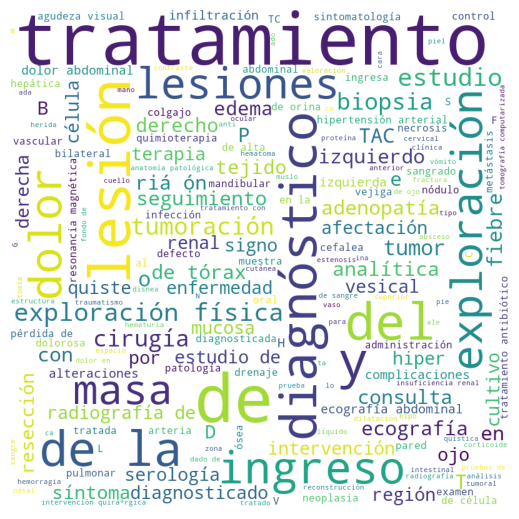

In [9]:
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

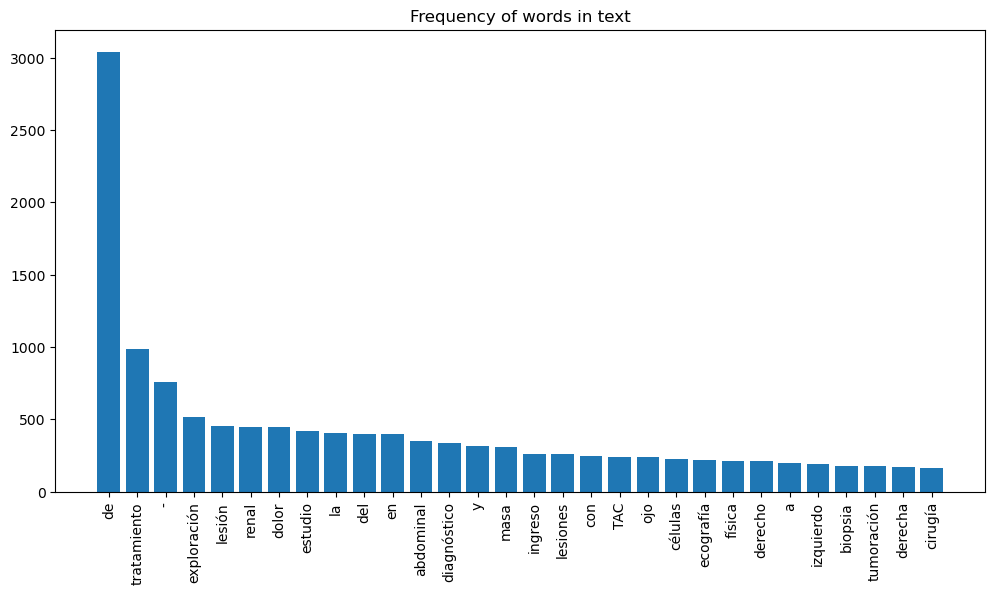

In [10]:
# split the text into words
words = text.split()

# create a dictionary to count the frequency of each word
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# create a list of tuples containing the word and its frequency
word_freqs = [(word, count) for word, count in word_counts.items()]

# sort the list by frequency in descending order
word_freqs.sort(key=lambda x: x[1], reverse=True)

# extract the 30 most frequent words and their frequencies
top_words = [word for word, count in word_freqs[:30]]
top_counts = [count for word, count in word_freqs[:30]]

# create the histogram
plt.figure(figsize=(12,6))
plt.bar(top_words, top_counts)
plt.xticks(rotation=90)
plt.title('Frequency of words in text')
plt.show()

In [11]:
dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

{'de': 3041,
 'tratamiento': 986,
 '-': 761,
 'exploración': 514,
 'lesión': 456,
 'renal': 448,
 'dolor': 448,
 'estudio': 420,
 'la': 407,
 'del': 397,
 'en': 396,
 'abdominal': 353,
 'diagnóstico': 334,
 'y': 316,
 'masa': 309,
 'ingreso': 260,
 'lesiones': 259,
 'con': 247,
 'TAC': 239,
 'ojo': 237,
 'células': 224,
 'ecografía': 220,
 'física': 212,
 'derecho': 209,
 'a': 198,
 'izquierdo': 191,
 'biopsia': 178,
 'tumoración': 175,
 'derecha': 170,
 'cirugía': 164,
 'fiebre': 162,
 'arterial': 161,
 'analítica': 159,
 'intervención': 153,
 'inferior': 153,
 'TC': 153,
 'enfermedad': 153,
 'tumor': 152,
 'consulta': 150,
 'tórax': 149,
 'por': 146,
 'quiráºrgica': 144,
 'vesical': 139,
 'orina': 139,
 'radiografía': 137,
 'tomografía': 136,
 'carcinoma': 135,
 'resección': 133,
 'superior': 132,
 'C': 129,
 'seguimiento': 127,
 'adenopatías': 126,
 'alta': 126,
 'región': 126,
 'tejido': 125,
 'anti': 125,
 'to': 124,
 '2': 124,
 'riá±ón': 123,
 'signos': 122,
 ',': 122,
 'control'

In [12]:
len(word_counts)

9380

In [13]:
groups = df.groupby('Label').size()
groups.sort_values(ascending=False, inplace=True)
groups

Label
PROC    18416
DISO    15815
ANAT     8557
CHEM     5603
dtype: int64

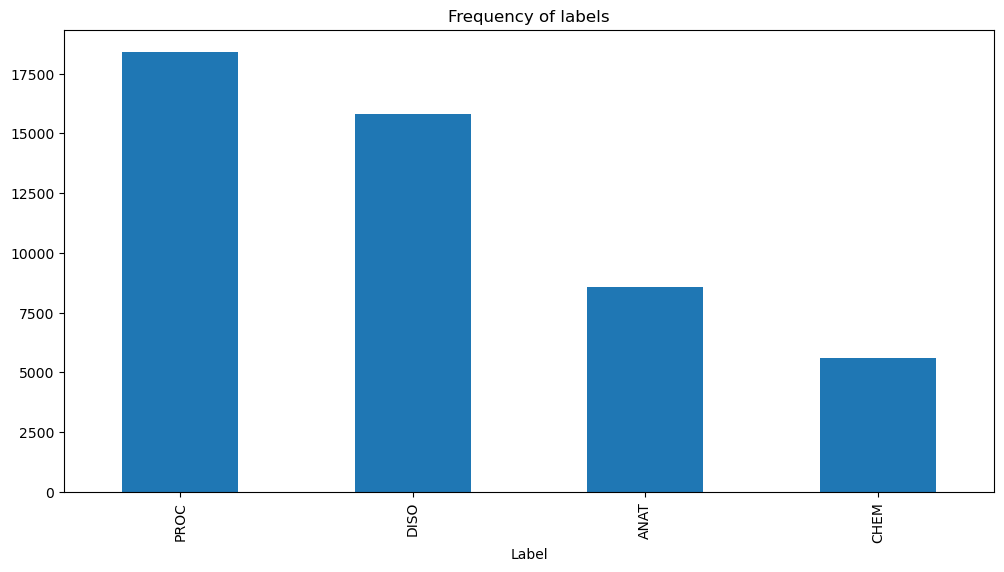

In [14]:
# create the histogram
plt.figure(figsize=(12,6))
groups.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of labels')
plt.show()

In [23]:
groups = df.groupby('FileNo').size()
print(groups.sort_values(ascending=False, inplace=False))

FileNo
437    132
316    124
508    124
413    121
143    119
      ... 
400     17
385     17
451     16
310     15
641     10
Length: 750, dtype: int64


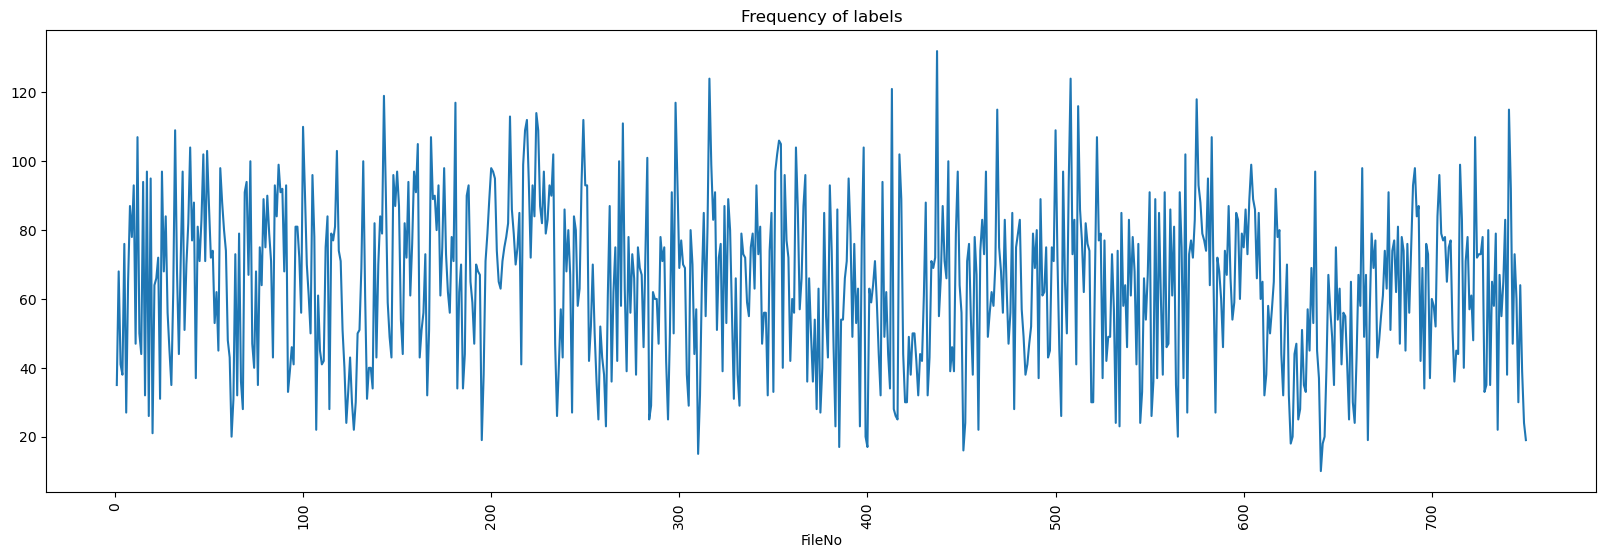

In [21]:
# create the histogram
plt.figure(figsize=(20,6))
groups.plot(kind='line')
plt.xticks(rotation=90)
plt.title('Frequency of labels')
plt.show()